<a href="https://colab.research.google.com/github/Yin-Tzu/predict_DA_reaction_product2/blob/main/3molecule_pi_orbital_filter/%E7%89%B9%E5%BE%B5%E5%90%91%E9%87%8F%E9%A0%90%E6%B8%ACHOMOLUMO%E7%9A%84%E6%95%B8%E6%93%9A%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

產生訓練驗證測試數據，a與s分別是不同園子數量的分子到不同訓練驗證測試
第一次的數據集2,6,10,12,16,20在訓練3000個，4與14在驗證1000個，8與18在測試1000個，20*3，中間一列是真的，旁邊是亂數

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab = [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    each_of_eig = 3000
    while each_of_eig>0:  # 只要500個矩陣
      g1 = 0
      for e in range(bb):
        if each_of_eig==0:  # 只要500個矩陣
          break
        if HOMO == g1:  # label所需
          l = 0
        elif LUMO == g1:
          l = 1
        else:
          l = 2
        g1 += 1
        b1 = eigvecs[:, e].reshape(bb, 1)
        for i in range(2):  # 為了在特徵向量左右兩邊都加亂數
          b2 = copy.deepcopy([])
          while len(b2)<bb:  # 製作旁邊的矩陣
            v = random.uniform(-1,1)  # 方法返回一個隨機數，其在0至1的範圍之內
            b2.append(v)
          b2 = copy.deepcopy(np.array(b2).reshape(bb, 1))
          if i==0:
            bbb = np.concatenate((b2, b1), axis=1)
          else:  # 製作完的矩陣放在另一邊
            bbb = np.concatenate((bbb, b2), axis=1)
        for d in range(c):  # 插入0
          bbb = np.insert(bbb, np.size(bbb,0), np.zeros(3), 0)
          bbb = np.insert(bbb, 0, np.zeros(3), 0)
        #print(bbb.shape)
        bbb = copy.deepcopy(bbb[:,:, np.newaxis])
        bbb = copy.deepcopy(bbb[np.newaxis, :])
        #print(bbb.shape)
        each_of_eig-=1  # 只要500個矩陣
        if s=='train':
          if len(train_img) == 0:
            train_img = copy.deepcopy(bbb)
            train_lab = np.array([l])
            print("aaa")
          else:
            train_img = np.concatenate((train_img, bbb), axis=0)
            train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
            if len(train_img)==3:
              print(train_img, train_lab)
        elif s=='valid':
          if len(valid_img) == 0:
            valid_img = copy.deepcopy(bbb)
            valid_lab = np.array([l])
          else:
            valid_img = np.concatenate((valid_img, bbb), axis=0)
            valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
        else:
          if len(test_img) == 0:
            test_img = copy.deepcopy(bbb)
            test_lab = np.array([l])
          else:
            test_img = np.concatenate((test_img, bbb), axis=0)
            test_lab = np.concatenate((test_lab, np.array([l])), axis=0)
      
dataset([2,6,10,12,16,20], s='train')
dataset([4,14], s='valid')
dataset([8,18], s='test')
print(train_lab)
print(train_img.shape, train_lab.shape)
print(valid_img.shape, valid_lab.shape)
print(test_img.shape, test_lab.shape)
#print(train_img[0:5,:,:,:])
np.random.seed(116)
np.random.shuffle(train_img)
np.random.seed(116)
np.random.shuffle(train_lab)
np.random.seed(9595)
np.random.shuffle(valid_img)
np.random.seed(9595)
np.random.shuffle(valid_lab)
np.random.seed(357)
np.random.shuffle(test_img)
np.random.seed(357)
np.random.shuffle(test_lab)

np.save('X_train', train_img)
np.save('X_test', test_img)
np.save('y_train', train_lab)
np.save('y_test', test_lab)
np.save('X_valid', valid_img)
np.save('y_valid', valid_lab)



1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.45784854]
   [ 0.70710678]
   [ 0.06626673]]

  [[-0.16717952]
   [ 0.70710678]
   [ 0.21873443]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.

若左邊又見不能下載，可以用這個下載檔案

In [ ]:
from google.colab import files
f = ['X_train.npy','X_test.npy','y_train.npy','y_test.npy','y_test2.npy','X_test2.npy']
for i in f:
  files.download(i)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

20*1，訓練集有2,6,10,12,16,20，4與14在驗證，8與18在測試

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab = [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    each_of_eig = 1000
    while each_of_eig>0:  # 只要500個矩陣
      g1 = 0
      for e in range(bb):
        if each_of_eig==0:  # 只要500個矩陣
          break
        if HOMO == g1:  # label所需
          l = 0
        elif LUMO == g1:
          l = 1
        else:
          l = 2
        g1 += 1
        b1 = eigvecs[:, e].reshape(bb, 1)
        bbb = copy.deepcopy(b1)
        for d in range(c):  # 插入0
          bbb = np.insert(bbb, np.size(bbb,0), np.zeros(1), 0)
          bbb = np.insert(bbb, 0, np.zeros(1), 0)
        #print(bbb.shape)
        bbb = copy.deepcopy(bbb[:,:, np.newaxis])
        bbb = copy.deepcopy(bbb[np.newaxis, :])
        #print(bbb.shape)
        each_of_eig-=1  # 只要500個矩陣
        if s=='train':
          if len(train_img) == 0:
            train_img = copy.deepcopy(bbb)
            train_lab = np.array([l])
            print("aaa")
          else:
            train_img = np.concatenate((train_img, bbb), axis=0)
            train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
            if len(train_img)==3:
              print(train_img, train_lab)
        elif s=='valid':
          if len(valid_img) == 0:
            valid_img = copy.deepcopy(bbb)
            valid_lab = np.array([l])
          else:
            valid_img = np.concatenate((valid_img, bbb), axis=0)
            valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
        else:
          if len(test_img) == 0:
            test_img = copy.deepcopy(bbb)
            test_lab = np.array([l])
          else:
            test_img = np.concatenate((test_img, bbb), axis=0)
            test_lab = np.concatenate((test_lab, np.array([l])), axis=0)

dataset([2,6,10,12,16,20], s='train')
dataset([4,14], s='valid')
dataset([8,18], s='test')
print(train_lab)
print(train_img.shape, train_lab.shape)
print(valid_img.shape, valid_lab.shape)
print(test_img.shape, test_lab.shape)
np.random.seed(116)
np.random.shuffle(train_img)
np.random.seed(116)
np.random.shuffle(train_lab)
np.random.seed(9595)
np.random.shuffle(valid_img)
np.random.seed(9595)
np.random.shuffle(valid_lab)
np.random.seed(357)
np.random.shuffle(test_img)
np.random.seed(357)
np.random.shuffle(test_lab)

np.save('X_train', train_img)
np.save('X_test', test_img)
np.save('y_train', train_lab)
np.save('y_test', test_lab)
np.save('X_valid', valid_img)
np.save('y_valid', valid_lab)


1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
[[[[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.70710678]]

  [[ 0.70710678]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]]


 [[[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[-0.70710678]]

  [[ 0.70710678]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]]


 [[[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.        ]]

  [[ 0.    

20*3，主要是中間，旁邊是其他軌域，分三類

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab= [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    #each_of_eig = 1000
    g1 = 0
    for e in range(bb):
      #if each_of_eig==0:  # 只要500個矩陣
      #  break
      if HOMO == g1:  # label所需
        l = 0
      elif LUMO == g1:
        l = 1
      else:
        l = 2
      g1 += 1
      b1 = eigvecs[:, e].reshape(bb, 1)
      bbb = copy.deepcopy(b1)
      for d in range(c):  # 插入0
        bbb = np.insert(bbb, np.size(bbb,0), np.zeros(1), 0)
        bbb = np.insert(bbb, 0, np.zeros(1), 0)
      #print(bbb.shape)
      bbb = copy.deepcopy(bbb[:,:, np.newaxis])
      bbb = copy.deepcopy(bbb[np.newaxis, :])
      #print(bbb.shape)
      if len(img) == 0:
        img = copy.deepcopy(bbb)
        lab = np.array([l])
        print("aaa")
      else:
        img = np.concatenate((img, bbb), axis=0)
        lab = np.concatenate((lab, np.array([l])), axis=0)
    each_of_eig = 3000
    while each_of_eig>0:  # 只要500個矩陣
      for i in range(len(img)):
        true_img = copy.deepcopy(img[i])
        #true_img=true_img.reshape(20,1,1)
        print(true_img.shape)
        l=copy.deepcopy(lab[i])
        if each_of_eig==0:  # 只要500個矩陣
          break
        for j in range(len(img)):
          left_img = copy.deepcopy(img[j])
          if each_of_eig==0:  # 只要500個矩陣
            break
          for k in range(len(img)):
            if each_of_eig==0:  # 只要500個矩陣
              break
            right_img = copy.deepcopy(img[k])
            #right_img=right_img.reshape(20,1,1)
            #print(right_img.shape)
            #print(true_img.shape)
            concat_img = copy.deepcopy(np.concatenate((true_img, right_img), axis=1))
            #print(true_img.shape)
            concat_img = np.concatenate((left_img, concat_img), axis=1)
            concat_img = copy.deepcopy(concat_img[np.newaxis, :])
            #print(bbb.shape)
            each_of_eig-=1  # 只要500個矩陣
            if s=='train':
              if len(train_img) == 0:
                train_img = copy.deepcopy(concat_img)
                train_lab = np.array([l])
                print("aaa")
              else:
                train_img = np.concatenate((train_img, concat_img), axis=0)
                train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
                if len(train_img)==3:
                  print(train_img, train_lab)
            elif s=='valid':
              if len(valid_img) == 0:
                valid_img = copy.deepcopy(concat_img)
                valid_lab = np.array([l])
              else:
                valid_img = np.concatenate((valid_img, concat_img), axis=0)
                valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
            else:
              if len(test_img) == 0:
                test_img = copy.deepcopy(concat_img)
                test_lab = np.array([l])
              else:
                test_img = np.concatenate((test_img, concat_img), axis=0)
                test_lab = np.concatenate((test_lab, np.array([l])), axis=0)

dataset([2,6,10,12,16,20], s='train')
dataset([4,14], s='valid')
dataset([8,18], s='test')
print(train_lab)
print(train_img.shape, train_lab.shape)
print(valid_img.shape, valid_lab.shape)
print(test_img.shape, test_lab.shape)
np.random.seed(116)
np.random.shuffle(train_img)
np.random.seed(116)
np.random.shuffle(train_lab)
np.random.seed(9595)
np.random.shuffle(valid_img)
np.random.seed(9595)
np.random.shuffle(valid_lab)
np.random.seed(357)
np.random.shuffle(test_img)
np.random.seed(357)
np.random.shuffle(test_lab)

np.save('X_train', train_img)
np.save('X_test', test_img)
np.save('y_train', train_lab)
np.save('y_test', test_lab)
np.save('X_valid', valid_img)
np.save('y_valid', valid_lab)



1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
(20, 1, 1)
aaa
[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.    

20*3，主要是中間，旁邊是其他軌域，分七類

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab= [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    HOMO1, LUMO1, HOMO2, LUMO2=-1,-1,-1,-1
    if bb>2:
      HOMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-2)])
      LUMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+1)])
    if bb>4:
      HOMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-3)])
      LUMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+2)])
    #each_of_eig = 1000
    g1 = 0
    for e in range(bb):
      #if each_of_eig==0:  # 只要500個矩陣
      #  break
      if HOMO == g1:  # label所需
        l = 0
      elif LUMO == g1:
        l = 1
      elif HOMO1==g1:
        l=2
      elif LUMO1==g1:
        l=3
      elif HOMO2==g1:
        l=4
      elif LUMO2==g1:
        l=5
      else:
        l = 6
      g1 += 1
      b1 = eigvecs[:, e].reshape(bb, 1)
      bbb = copy.deepcopy(b1)
      for d in range(c):  # 插入0
        bbb = np.insert(bbb, np.size(bbb,0), np.zeros(1), 0)
        bbb = np.insert(bbb, 0, np.zeros(1), 0)
      #print(bbb.shape)
      bbb = copy.deepcopy(bbb[:,:, np.newaxis])
      bbb = copy.deepcopy(bbb[np.newaxis, :])
      #print(bbb.shape)
      if len(img) == 0:
        img = copy.deepcopy(bbb)
        lab = np.array([l])
        print("aaa")
      else:
        img = np.concatenate((img, bbb), axis=0)
        lab = np.concatenate((lab, np.array([l])), axis=0)
    each_of_eig = 3000
    while each_of_eig>0:  # 只要500個矩陣
      for i in range(len(img)):
        true_img = copy.deepcopy(img[i])
        #true_img=true_img.reshape(20,1,1)
        print(true_img.shape)
        l=copy.deepcopy(lab[i])
        if each_of_eig==0:  # 只要500個矩陣
          break
        for j in range(len(img)):
          left_img = copy.deepcopy(img[j])
          if each_of_eig==0:  # 只要500個矩陣
            break
          for k in range(len(img)):
            if each_of_eig==0:  # 只要500個矩陣
              break
            right_img = copy.deepcopy(img[k])
            #right_img=right_img.reshape(20,1,1)
            #print(right_img.shape)
            #print(true_img.shape)
            concat_img = copy.deepcopy(np.concatenate((true_img, right_img), axis=1))
            #print(true_img.shape)
            concat_img = np.concatenate((left_img, concat_img), axis=1)
            concat_img = copy.deepcopy(concat_img[np.newaxis, :])
            #print(bbb.shape)
            each_of_eig-=1  # 只要500個矩陣
            if s=='train':
              if len(train_img) == 0:
                train_img = copy.deepcopy(concat_img)
                train_lab = np.array([l])
                print("aaa")
              else:
                train_img = np.concatenate((train_img, concat_img), axis=0)
                train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
                if len(train_img)==3:
                  print(train_img, train_lab)
            elif s=='valid':
              if len(valid_img) == 0:
                valid_img = copy.deepcopy(concat_img)
                valid_lab = np.array([l])
              else:
                valid_img = np.concatenate((valid_img, concat_img), axis=0)
                valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
            else:
              if len(test_img) == 0:
                test_img = copy.deepcopy(concat_img)
                test_lab = np.array([l])
              else:
                test_img = np.concatenate((test_img, concat_img), axis=0)
                test_lab = np.concatenate((test_lab, np.array([l])), axis=0)

dataset([2,6,10,12,16,20], s='train')
dataset([4,14], s='valid')
dataset([8,18], s='test')
print(train_lab)
print(train_img.shape, train_lab.shape)
print(valid_img.shape, valid_lab.shape)
print(test_img.shape, test_lab.shape)
np.random.seed(116)
np.random.shuffle(train_img)
np.random.seed(116)
np.random.shuffle(train_lab)
np.random.seed(9595)
np.random.shuffle(valid_img)
np.random.seed(9595)
np.random.shuffle(valid_lab)
np.random.seed(357)
np.random.shuffle(test_img)
np.random.seed(357)
np.random.shuffle(test_lab)

np.save('X_train', train_img)
np.save('X_test', test_img)
np.save('y_train', train_lab)
np.save('y_test', test_lab)
np.save('X_valid', valid_img)
np.save('y_valid', valid_lab)

1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
(20, 1, 1)
aaa
[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.    

旁邊是隨機的，但是分七類

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab = [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    HOMO1, LUMO1, HOMO2, LUMO2=-1,-1,-1,-1
    if bb>2:
      HOMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-2)])
      LUMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+1)])
    if bb>4:
      HOMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-3)])
      LUMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+2)])
    each_of_eig = 3000
    while each_of_eig>0:  # 只要500個矩陣
      g1 = 0
      for e in range(bb):
        if each_of_eig==0:  # 只要500個矩陣
          break
        if HOMO == g1:  # label所需
          l = 0
        elif LUMO == g1:
          l = 1
        elif HOMO1==g1:
          l=2
        elif LUMO1==g1:
          l=3
        elif HOMO2==g1:
          l=4
        elif LUMO2==g1:
          l=5
        else:
          l = 6
        g1 += 1
      
        b1 = eigvecs[:, e].reshape(bb, 1)
        for i in range(2):  # 為了在特徵向量左右兩邊都加亂數
          b2 = copy.deepcopy([])
          while len(b2)<bb:  # 製作旁邊的矩陣
            v = random.uniform(-1,1)  # 方法返回一個隨機數，其在0至1的範圍之內
            b2.append(v)
          b2 = copy.deepcopy(np.array(b2).reshape(bb, 1))
          if i==0:
            bbb = np.concatenate((b2, b1), axis=1)
          else:  # 製作完的矩陣放在另一邊
            bbb = np.concatenate((bbb, b2), axis=1)
        for d in range(c):  # 插入0
          bbb = np.insert(bbb, np.size(bbb,0), np.zeros(3), 0)
          bbb = np.insert(bbb, 0, np.zeros(3), 0)
        #print(bbb.shape)
        bbb = copy.deepcopy(bbb[:,:, np.newaxis])
        bbb = copy.deepcopy(bbb[np.newaxis, :])
        #print(bbb.shape)
        each_of_eig-=1  # 只要500個矩陣
        if s=='train':
          if len(train_img) == 0:
            train_img = copy.deepcopy(bbb)
            train_lab = np.array([l])
            print("aaa")
          else:
            train_img = np.concatenate((train_img, bbb), axis=0)
            train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
            if len(train_img)==3:
              print(train_img, train_lab)
        elif s=='valid':
          if len(valid_img) == 0:
            valid_img = copy.deepcopy(bbb)
            valid_lab = np.array([l])
          else:
            valid_img = np.concatenate((valid_img, bbb), axis=0)
            valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
        else:
          if len(test_img) == 0:
            test_img = copy.deepcopy(bbb)
            test_lab = np.array([l])
          else:
            test_img = np.concatenate((test_img, bbb), axis=0)
            test_lab = np.concatenate((test_lab, np.array([l])), axis=0)
      
dataset([2,6,10,12,16,20], s='train')
dataset([4,14], s='valid')
dataset([8,18], s='test')
print(train_lab)
print(train_img.shape, train_lab.shape)
print(valid_img.shape, valid_lab.shape)
print(test_img.shape, test_lab.shape)
#print(train_img[0:5,:,:,:])
np.random.seed(116)
np.random.shuffle(train_img)
np.random.seed(116)
np.random.shuffle(train_lab)
np.random.seed(9595)
np.random.shuffle(valid_img)
np.random.seed(9595)
np.random.shuffle(valid_lab)
np.random.seed(357)
np.random.shuffle(test_img)
np.random.seed(357)
np.random.shuffle(test_lab)

np.save('X_train', train_img)
np.save('X_test', test_img)
np.save('y_train', train_lab)
np.save('y_test', test_lab)
np.save('X_valid', valid_img)
np.save('y_valid', valid_lab)



1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[-0.63243982]
   [ 0.70710678]
   [ 0.48064019]]

  [[ 0.11550321]
   [ 0.70710678]
   [-0.37250675]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.

隨機分配訓練驗證測試，分7類，30*3，旁邊是軌域

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


train_img, train_lab, valid_img, valid_lab, test_img, test_lab= [], [], [], [], [], []
def dataset(a, s='train'): # 
  global train_img, train_lab, valid_img, valid_lab, test_img, test_lab
  
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    HOMO1, LUMO1, HOMO2, LUMO2=-1,-1,-1,-1
    if bb>2:
      HOMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-2)])
      LUMO1 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+1)])
    if bb>4:
      HOMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-3)])
      LUMO2 = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)+2)])
    #each_of_eig = 1000
    g1 = 0
    for e in range(bb):
      #if each_of_eig==0:  # 只要500個矩陣
      #  break
      if HOMO == g1:  # label所需
        l = 0
      elif LUMO == g1:
        l = 1
      elif HOMO1==g1:
        l=2
      elif LUMO1==g1:
        l=3
      elif HOMO2==g1:
        l=4
      elif LUMO2==g1:
        l=5
      else:
        l = 6
      g1 += 1
      b1 = eigvecs[:, e].reshape(bb, 1)
      bbb = copy.deepcopy(b1)
      for d in range(c):  # 插入0
        bbb = np.insert(bbb, np.size(bbb,0), np.zeros(1), 0)
        bbb = np.insert(bbb, 0, np.zeros(1), 0)
      #print(bbb.shape)
      bbb = copy.deepcopy(bbb[:,:, np.newaxis])
      bbb = copy.deepcopy(bbb[np.newaxis, :])
      #print(bbb.shape)
      if len(img) == 0:
        img = copy.deepcopy(bbb)
        lab = np.array([l])
        print("aaa")
      else:
        img = np.concatenate((img, bbb), axis=0)
        lab = np.concatenate((lab, np.array([l])), axis=0)
    each_of_eig = 3000
    while each_of_eig>0:  # 只要500個矩陣
      for i in range(len(img)):
        true_img = copy.deepcopy(img[i])
        #true_img=true_img.reshape(20,1,1)
        print(true_img.shape)
        l=copy.deepcopy(lab[i])
        if each_of_eig==0:  # 只要500個矩陣
          break
        for j in range(len(img)):
          left_img = copy.deepcopy(img[j])
          if each_of_eig==0:  # 只要500個矩陣
            break
          for k in range(len(img)):
            if each_of_eig==0:  # 只要500個矩陣
              break
            right_img = copy.deepcopy(img[k])
            #right_img=right_img.reshape(20,1,1)
            #print(right_img.shape)
            #print(true_img.shape)
            concat_img = copy.deepcopy(np.concatenate((true_img, right_img), axis=1))
            #print(true_img.shape)
            concat_img = np.concatenate((left_img, concat_img), axis=1)
            concat_img = copy.deepcopy(concat_img[np.newaxis, :])
            #print(bbb.shape)
            each_of_eig-=1  # 只要500個矩陣
            if s=='train':
              if len(train_img) == 0:
                train_img = copy.deepcopy(concat_img)
                train_lab = np.array([l])
                print("aaa")
              else:
                train_img = np.concatenate((train_img, concat_img), axis=0)
                train_lab = np.concatenate((train_lab, np.array([l])), axis=0)
                if len(train_img)==3:
                  print(train_img, train_lab)
            elif s=='valid':
              if len(valid_img) == 0:
                valid_img = copy.deepcopy(concat_img)
                valid_lab = np.array([l])
              else:
                valid_img = np.concatenate((valid_img, concat_img), axis=0)
                valid_lab = np.concatenate((valid_lab, np.array([l])), axis=0)
            else:
              if len(test_img) == 0:
                test_img = copy.deepcopy(concat_img)
                test_lab = np.array([l])
              else:
                test_img = np.concatenate((test_img, concat_img), axis=0)
                test_lab = np.concatenate((test_lab, np.array([l])), axis=0)

dataset([2,4,6,8,10,12,14,16,18,20], s='train')
X_train, X_test, y_train, y_test = train_test_split(train_img, train_lab, test_size=0.2, random_state=20, shuffle=True)
np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)


1 0
[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
0
1
aaa
(20, 1, 1)
aaa
[[[[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.70710678]
   [ 0.70710678]
   [ 0.70710678]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.    

想看特徵向量

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random


for bb in [4]: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    for e in range(bb):
        b1 = eigvecs[:, e].reshape(bb, 1)
        print(b1)

1 0
2 1
3 2
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
[-1.61803399 -0.61803399  1.61803399  0.61803399]
[[ 0.37174803  0.60150096 -0.37174803 -0.60150096]
 [-0.60150096 -0.37174803 -0.60150096 -0.37174803]
 [ 0.60150096 -0.37174803 -0.60150096  0.37174803]
 [-0.37174803  0.60150096 -0.37174803  0.60150096]]
[[ 0.37174803]
 [-0.60150096]
 [ 0.60150096]
 [-0.37174803]]
[[ 0.60150096]
 [-0.37174803]
 [-0.37174803]
 [ 0.60150096]]
[[-0.37174803]
 [-0.60150096]
 [-0.60150096]
 [-0.37174803]]
[[-0.60150096]
 [-0.37174803]
 [ 0.37174803]
 [ 0.60150096]]


不同C，2(4,6,8...)X3X1，3，隨機，直鏈

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random

img,lab=[],[]
def dataset(a): # 
  global img, lab
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    each_of_eig = 300
    while each_of_eig>0:  # 只要500個矩陣
      g1 = 0
      for e in range(bb):
        if each_of_eig==0:  # 只要500個矩陣
          break
        if HOMO == g1:  # label所需
          l = 0
        elif LUMO == g1:
          l = 1
        else:
          l = 2
        g1 += 1
        b1 = eigvecs[:, e].reshape(bb, 1)
        for i in range(2):  # 為了在特徵向量左右兩邊都加亂數
          b2 = copy.deepcopy([])
          while len(b2)<bb:  # 製作旁邊的矩陣
            v = random.uniform(-1,1)  # 方法返回一個隨機數，其在0至1的範圍之內
            b2.append(v)
          b2 = copy.deepcopy(np.array(b2).reshape(bb, 1))
          if i==0:
            bbb = np.concatenate((b2, b1), axis=1)
          else:  # 製作完的矩陣放在另一邊
            bbb = np.concatenate((bbb, b2), axis=1)
        #print(bbb.shape)
        bbb = copy.deepcopy(bbb[:,:, np.newaxis])
        bbb = copy.deepcopy(bbb[np.newaxis, :])
        #print(bbb.shape)
        each_of_eig-=1  # 只要500個矩陣
        if len(img) == 0:
            img = copy.deepcopy(bbb)
            lab = np.array([l])
        else:
            img = np.concatenate((img, bbb), axis=0)
            lab = np.concatenate((lab, np.array([l])), axis=0)
dataset([20])

print(img.shape, lab.shape)

X_train, X_test, y_train, y_test = train_test_split(img, lab, test_size=0.2, random_state=93483, shuffle=True)

np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)




1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[-1.97766165 -1.91114561 -1.80193774 -1.6524

不同C，2(4,6,8...)X3X1，3，軌域，直鏈

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random

img, lab,test2_lab, test2_img= [], [],[],[]
def dataset(a): # 
  global img, lab,test2_lab, test2_img
  
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals_list=eigvals.tolist()
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    g1 = 0
    for e in range(bb):
      #if each_of_eig==0:  # 只要500個矩陣
      #  break
      if HOMO == g1:  # label所需
        l = 0
      elif LUMO == g1:
        l = 1
      else:
        l = 2
      g1 += 1
      b1 = eigvecs[:, e].reshape(bb, 1)
      bbb = copy.deepcopy(b1)
      #print(bbb.shape)
      bbb = copy.deepcopy(bbb[:,:, np.newaxis])
      bbb = copy.deepcopy(bbb[np.newaxis, :])
      #print(bbb.shape)
      if len(img) == 0:
        img = copy.deepcopy(bbb)
        lab = np.array([l])
        print("aaa")
      else:
        img = np.concatenate((img, bbb), axis=0)
        lab = np.concatenate((lab, np.array([l])), axis=0)
    for i in range(len(img)):
        true_img = copy.deepcopy(img[i])
        #true_img=true_img.reshape(20,1,1)
        print(true_img.shape)
        l=copy.deepcopy(lab[i])
        for j in range(len(img)):
          left_img = copy.deepcopy(img[j])
          for k in range(len(img)):
            right_img = copy.deepcopy(img[k])
            #right_img=right_img.reshape(20,1,1)
            #print(right_img.shape)
            #print(true_img.shape)
            concat_img = copy.deepcopy(np.concatenate((true_img, right_img), axis=1))
            #print(true_img.shape)
            concat_img = np.concatenate((left_img, concat_img), axis=1)
            concat_img = copy.deepcopy(concat_img[np.newaxis, :])
            #print(bbb.shape)
            if len(test2_img) == 0:
                test2_img = copy.deepcopy(concat_img)
                test2_lab = np.array([l])
                print("aaa")
            else:
                test2_img = np.concatenate((test2_img, concat_img), axis=0)
                test2_lab = np.concatenate((test2_lab, np.array([l])), axis=0)

dataset([20])

#print(train_img[0:5,:,:,:])

np.random.seed(846)
np.random.shuffle(test2_img)
np.random.seed(846)
np.random.shuffle(test2_lab)
print(test2_img,test2_lab)


np.save('X_test2', test2_img)

np.save('y_test2', test2_lab)



1 0
2 1
3 2
4 3
5 4
6 5
7 6
8 7
9 8
10 9
11 10
12 11
13 12
14 13
15 14
16 15
17 16
18 17
19 18
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[-1.97766165 -1.91114561 -1.80193774 -1.6524

不同C，5、6X3X1，3，隨機，環

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
#import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random
import calculation_eig

img,lab=[],[]
def dataset(a): # 
  global img, lab
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    H[p1, 0] = 1
    H[0, p1] = 1
    print(H)
    #eigvals, eigvecs = la.eig(H)
    eigvals, eigvecs = calculation_eig.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    """
    a,e=np.linalg.eig(H)
    print(a)
    print(e)
    b1,b2=calculation_eig.eigh(H)
    print(b1)
    print(b2)
    c1,c2=np.linalg.eig(H)
    print(c1)
    print(c2)
    """
    eigvals=np.around(eigvals,5)
    print(eigvals)
    eigvals_list=eigvals.tolist()
    print(sorted(eigvals_list,reverse = True))
    print(eigvals_list)
    
    if bb%2==1:
      homoindex=int((bb//2))
    else:
      homoindex=int((bb//2)-1)
    HOM=[]
    for x in range(len(eigvals_list)):
      if eigvals_list[x]==sorted(eigvals_list,reverse = True)[homoindex]:
        HOM.append(x)
    print(HOM)
    #print(sorted(eigvals_list,reverse = True)[(sorted(eigvals_list,reverse = True).index(eigvals_list[HOM[0]])+len(HOM))])
    LUM=[]
    for x in range(len(eigvals_list)):
      if eigvals_list[x]==sorted(eigvals_list,reverse = True)[(sorted(eigvals_list,reverse = True).index(eigvals_list[HOM[0]])+len(HOM))]:
        LUM.append(x)
    print(LUM)
    #LUM=eigvals_list.index(sorted(eigvals_list,reverse = True)[(sorted(eigvals_list,reverse = True).index(eigvals_list[HOM[0]])+len(HOM))])
    """
    HOMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2)-1)])
    print(HOMO)
    LUMO = eigvals_list.index(sorted(eigvals_list,reverse = True)[int((bb/2))])
    print(LUMO)
    """
    each_of_eig = 6
    while each_of_eig>0:  # 只要500個矩陣
      g1 = 0
      for e in range(bb):
        if each_of_eig==0:  # 只要500個矩陣
          break
        HOMl=[0 for x in range(len(HOM)) if g1==HOM[x]]
        LUMl=[0 for x in range(len(LUM)) if g1==LUM[x]]
        if len(HOMl)>0:
          l = 0
        elif len(LUMl)>0:
          l = 1
        else:
          l = 2
        g1 += 1
        b1 = eigvecs[:, e].reshape(bb, 1)
        for i in range(2):  # 為了在特徵向量左右兩邊都加亂數
          b2 = copy.deepcopy([])
          while len(b2)<bb:  # 製作旁邊的矩陣
            v = random.uniform(-1,1)  # 方法返回一個隨機數，其在0至1的範圍之內
            b2.append(v)
          b2 = copy.deepcopy(np.array(b2).reshape(bb, 1))
          if i==0:
            bbb = np.concatenate((b2, b1), axis=1)
          else:  # 製作完的矩陣放在另一邊
            bbb = np.concatenate((bbb, b2), axis=1)
        #print(bbb.shape)
        bbb = copy.deepcopy(bbb[:,:, np.newaxis])
        bbb = copy.deepcopy(bbb[np.newaxis, :])
        #print(bbb.shape)
        each_of_eig-=1  # 只要500個矩陣
        if len(img) == 0:
            img = copy.deepcopy(bbb)
            lab = np.array([l])
        else:
            img = np.concatenate((img, bbb), axis=0)
            lab = np.concatenate((lab, np.array([l])), axis=0)
            #if l==2:
              #print(b1)

dataset([5])

print(img.shape, lab.shape)
"""
X_train, X_test, y_train, y_test = train_test_split(img, lab, test_size=0.2, random_state=93483, shuffle=True)

np.save('X_train', X_train)
np.save('X_test', X_test)
np.save('y_train', y_train)
np.save('y_test', y_test)
"""



1 0
2 1
3 2
4 3
[[0 1 0 0 1]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [1 0 0 1 0]]
[ 0.61803399  0.61803399 -1.61803399 -1.61803399  2.        ]
[[ 0.60129589 -0.19607085 -0.47600716 -0.41643428  0.44721264]
 [-0.00066254 -0.63245861  0.14032419  0.6166908   0.44721052]
 [-0.60170536 -0.19481028  0.24895786 -0.58139526  0.44721265]
 [-0.37121182  0.5120536  -0.54314646  0.32402561  0.44721608]
 [ 0.37228384  0.51127527  0.62987158  0.05711314  0.44721608]]
[ 0.61803  0.61803 -1.61803 -1.61803  2.     ]
[2.0, 0.61803, 0.61803, -1.61803, -1.61803]
[0.61803, 0.61803, -1.61803, -1.61803, 2.0]
[0, 1]
[2, 3]
(6, 5, 3, 1) (6,)


"\nX_train, X_test, y_train, y_test = train_test_split(img, lab, test_size=0.2, random_state=93483, shuffle=True)\n\nnp.save('X_train', X_train)\nnp.save('X_test', X_test)\nnp.save('y_train', y_train)\nnp.save('y_test', y_test)\n"

不同C，5、6X3X1，3，軌域，環

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from PIL import Image
import copy
from sklearn.model_selection import train_test_split
import random

img, lab,test2_lab, test2_img= [], [],[],[]
def dataset(a): # 
  global img, lab,test2_lab, test2_img
  
  for bb in a: # a =[2,4,6,8,10,12,14,16,18,20]
    img,lab=[],[]
    c = int((20-bb)/2)  # 矩陣旁邊加c個0
    H=np.zeros([bb,bb]).astype('int64')
    for j in range(bb-1):
        p1 = j+1
        p2 = j
        print(p1, p2)
        H[p1, p2] = 1
        H[p2, p1] = 1
    H[p1, 0] = 1
    H[0, p1] = 1
    print(H)
    eigvals, eigvecs = la.eig(H)
    eigvals = eigvals.real
    #eigvals = eigvals.astype('float32')
    print(eigvals)
    print(eigvecs)
    eigvals=np.around(eigvals,5)
    eigvals_list=eigvals.tolist()
    if bb%2==1:
      homoindex=int((bb//2))
    else:
      homoindex=int((bb//2)-1)
    HOM=[]
    for x in range(len(eigvals_list)):
      if eigvals_list[x]==sorted(eigvals_list,reverse = True)[homoindex]:
        HOM.append(x)
    print(HOM)
    LUM=[]
    for x in range(len(eigvals_list)):
      if eigvals_list[x]==sorted(eigvals_list,reverse = True)[(sorted(eigvals_list,reverse = True).index(eigvals_list[HOM[0]])+len(HOM))]:
        LUM.append(x)
    print(LUM)
    g1 = 0
    for e in range(bb):
      #if each_of_eig==0:  # 只要500個矩陣
      #  break
      HOMl=[0 for x in range(len(HOM)) if g1==HOM[x]]
      LUMl=[0 for x in range(len(LUM)) if g1==LUM[x]]
      if len(HOMl)>0:
        l = 0
      elif len(LUMl)>0:
        l = 1
      else:
        l = 2
      g1 += 1
      b1 = eigvecs[:, e].reshape(bb, 1)
      bbb = copy.deepcopy(b1)
      #print(bbb.shape)
      bbb = copy.deepcopy(bbb[:,:, np.newaxis])
      bbb = copy.deepcopy(bbb[np.newaxis, :])
      #print(bbb.shape)
      if len(img) == 0:
        img = copy.deepcopy(bbb)
        lab = np.array([l])
        print("aaa")
      else:
        img = np.concatenate((img, bbb), axis=0)
        lab = np.concatenate((lab, np.array([l])), axis=0)
    for i in range(len(img)):
        true_img = copy.deepcopy(img[i])
        #true_img=true_img.reshape(20,1,1)
        print(true_img.shape)
        l=copy.deepcopy(lab[i])
        for j in range(len(img)):
          left_img = copy.deepcopy(img[j])
          for k in range(len(img)):
            right_img = copy.deepcopy(img[k])
            #right_img=right_img.reshape(20,1,1)
            #print(right_img.shape)
            #print(true_img.shape)
            concat_img = copy.deepcopy(np.concatenate((true_img, right_img), axis=1))
            #print(true_img.shape)
            concat_img = np.concatenate((left_img, concat_img), axis=1)
            concat_img = copy.deepcopy(concat_img[np.newaxis, :])
            #print(bbb.shape)
            if len(test2_img) == 0:
                test2_img = copy.deepcopy(concat_img)
                test2_lab = np.array([l])
                print("aaa")
            else:
                test2_img = np.concatenate((test2_img, concat_img), axis=0)
                test2_lab = np.concatenate((test2_lab, np.array([l])), axis=0)

dataset([6])

#print(train_img[0:5,:,:,:])

np.random.seed(846)
np.random.shuffle(test2_img)
np.random.seed(846)
np.random.shuffle(test2_lab)
print(test2_img,test2_lab)


np.save('X_test2', test2_img)

np.save('y_test2', test2_lab)



1 0
2 1
3 2
4 3
5 4
[[0 1 0 0 0 1]
 [1 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]]
[-2.  2.  1. -1. -1.  1.]
[[ 0.40824829 -0.40824829 -0.57735027  0.57732307  0.06604706  0.09791921]
 [-0.40824829 -0.40824829 -0.28867513 -0.29351503 -0.5297411  -0.4437968 ]
 [ 0.40824829 -0.40824829  0.28867513 -0.28380804  0.46369403 -0.54171601]
 [-0.40824829 -0.40824829  0.57735027  0.57732307  0.06604706 -0.09791921]
 [ 0.40824829 -0.40824829  0.28867513 -0.29351503 -0.5297411   0.4437968 ]
 [-0.40824829 -0.40824829 -0.28867513 -0.28380804  0.46369403  0.54171601]]
[2, 5]
[3, 4]
aaa
(6, 1, 1)
aaa
(6, 1, 1)
(6, 1, 1)
(6, 1, 1)
(6, 1, 1)
(6, 1, 1)
[[[[ 0.57732307]
   [ 0.57732307]
   [ 0.06604706]]

  [[-0.29351503]
   [-0.29351503]
   [-0.5297411 ]]

  [[-0.28380804]
   [-0.28380804]
   [ 0.46369403]]

  [[ 0.57732307]
   [ 0.57732307]
   [ 0.06604706]]

  [[-0.29351503]
   [-0.29351503]
   [-0.5297411 ]]

  [[-0.28380804]
   [-0.28380804]
   [ 0.46369403]]]


 [[[-0.408

(6, 6, 3, 1)
(6, 6, 3, 1)
(6, 6, 3, 1)
(6, 6, 3, 1)
(6, 6, 3, 1)
(6, 6, 3, 1)


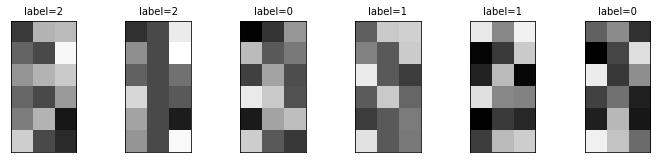

In [ ]:
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
def printimg(imgg,labb):
  j=0
  for i in range(len(imgg)):
    imggg=copy.deepcopy(imgg)
    fig = plt.gcf()
    fig.set_size_inches(12, 14)  # 设置图表大小
    ax = plt.subplot(5, 6, 1 + j)  # 子图生成
    MiMaScaler = preprocessing.MinMaxScaler(feature_range=(0, 255))#
    print(imggg.shape)
    nsamples, nx, ny, d = imggg.shape
    n = imggg.reshape((nsamples*nx*ny*d, 1))
    MiMaScaler.fit(n)
    v=MiMaScaler.transform(n)
    imggg = v.reshape((nsamples,nx, ny))
    #print(np.uint8(imggg[i]))
    im = Image.fromarray(np.uint8(imggg[i]))
    ax.imshow(im, cmap='gray', vmin = 0, vmax = 255,interpolation='none')
    title = 'label=' + str(labb[i])
    ax.set_title(title, fontsize=10)  # 设置图像title
    ax.set_xticks([])  # 无x刻度
    ax.set_yticks([])  # 无y刻度
    j+=1
  plt.show()
printimg(img,lab)